In [1]:
import matplotlib.pyplot as plt
from pyteomics import mzml
import numpy as np
import pandas as pd

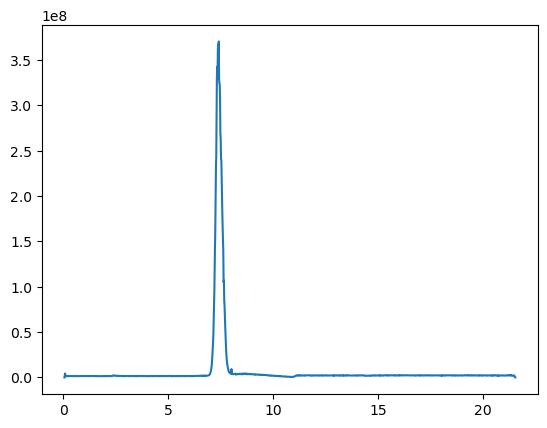

In [16]:
def pmppm(mass, ppm=4):
    return(mass*(1-ppm/1000000), mass*(1+ppm/1000000))

def get_chrom_mzml(file, mz, ppm):
    scan_dfs = []
    for spectrum in mzml.MzML(file):
        if spectrum['ms level'] == 1:
            rt_val = spectrum['scanList']['scan'][0]['scan start time']
            mz_vals=spectrum['m/z array']
            int_vals = spectrum['intensity array']

            mzmin, mzmax = pmppm(mz, ppm)
            bet_idxs = (spectrum["m/z array"]>mzmin) & (spectrum["m/z array"]<mzmax)
            if(sum(bet_idxs)>0):
                df_scan = pd.DataFrame({'mz':mz_vals[bet_idxs], 'int':int_vals[bet_idxs], 'rt':[rt_val]*sum(bet_idxs)})
                scan_dfs.append(df_scan)    
    return(pd.concat(scan_dfs, ignore_index=True))

chrom_data = get_chrom_mzml('180205_Poo_TruePoo_Full1.mzML', 118.0865, 10)

plt.plot(chrom_data["rt"], chrom_data["int"])
plt.show()

In [8]:
spectrum = mzml.MzML('180205_Poo_TruePoo_Full1.mzML')[0]

In [13]:
mzmin, mzmax = pmppm(118.0865, 5)
(spectrum["m/z array"]>mzmin) & (spectrum["m/z array"]<mzmax)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])